# ASL Decoding Model

In this project I will build a computer vision program that is able to decode the American Sign Language Alphabet, I will use the holistic model from mediapipe to detect hands and then based on the coordinates of each hand landmarks per each sign I will build a Machine Learning model to make predictions. Following is an image per each sign.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Asl_alphabet_gallaudet.svg/240px-Asl_alphabet_gallaudet.svg.png" />

## 0. Import dependencies

In [20]:
import pandas as pd
import numpy as np
import mediapipe as mp
import cv2

## 1. Make hand detections

<img src = "https://mediapipe.dev/images/mobile/hand_landmarks.png" />

In [21]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [22]:
cap = cv2.VideoCapture(1)
last_result = None

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        # Read from camera
        ret, frame = cap.read()

        # Flip frame
        frame = cv2.flip(frame, 1)

        # Convert from bgr 2 rgb
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Set flags to false
        image.flags.writeable = False

        # Make detectionsq
        results = holistic.process(image)

        if results:
            last_result = results

        # Set flags back to true
        image.flags.writeable = True

        # Draw left hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Draw right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Set image back to bgr
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show image
        cv2.imshow('Hand detection', image)

        if cv2.waitKey(10) & 0XFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

I0000 00:00:1707610801.642564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


## 2. Create dataset and instantiate features and class names

In [24]:
# Landmarks
last_result.left_hand_landmarks

landmark {
  x: 0.4758989
  y: 0.7740601
  z: 5.320567e-08
}
landmark {
  x: 0.41512576
  y: 0.7467324
  z: -0.009964755
}
landmark {
  x: 0.37169492
  y: 0.6574275
  z: -0.009081029
}
landmark {
  x: 0.34639916
  y: 0.5823477
  z: -0.010294845
}
landmark {
  x: 0.31945592
  y: 0.5393158
  z: -0.011937131
}
landmark {
  x: 0.41309357
  y: 0.52470523
  z: 0.00980965
}
landmark {
  x: 0.37973207
  y: 0.4356139
  z: -0.0003757576
}
landmark {
  x: 0.35378975
  y: 0.37690076
  z: -0.012006781
}
landmark {
  x: 0.3320316
  y: 0.32368052
  z: -0.021957869
}
landmark {
  x: 0.44135132
  y: 0.49534974
  z: 0.0018993105
}
landmark {
  x: 0.41759875
  y: 0.38360474
  z: -0.008722845
}
landmark {
  x: 0.39525065
  y: 0.30968037
  z: -0.021813495
}
landmark {
  x: 0.376227
  y: 0.2491917
  z: -0.03176197
}
landmark {
  x: 0.47102052
  y: 0.48778313
  z: -0.0098778345
}
landmark {
  x: 0.45610815
  y: 0.37035257
  z: -0.023823006
}
landmark {
  x: 0.43764186
  y: 0.2980523
  z: -0.03652659
}
landma

In [25]:
# Number of landmarks
number_of_hand_landmarks = len(last_result.left_hand_landmarks.landmark)
number_of_hand_landmarks

21

In [26]:
# Create names of columns
features = ['class']
for val in range(1, number_of_hand_landmarks+1):
    features += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']

features

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21']

In [27]:
import csv
with open('coords.csv', 'w', newline = '') as f:
    csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_writer.writerow(features)

In [28]:
import string
letters = list(string.ascii_uppercase)
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [29]:
numbers = [str(num) for num in range(0, 10)]
numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [30]:
class_names = letters + numbers
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

## 3. Create instances per each class
I will keep 600 images per each class/sign

In [31]:
import csv

In [43]:
# Function to generate 300 images of a certain class
def generate_data(class_name, hand):
    num_of_data = 0
    cap = cv2.VideoCapture(1)
    last_result = None
    
    with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
        while cap.isOpened():
    
            # Read from camera
            ret, frame = cap.read()
    
            # Flip frame
            frame = cv2.flip(frame, 1)
    
            # Convert from bgr 2 rgb
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
            # Set flags to false
            image.flags.writeable = False
    
            # Make detectionsq
            results = holistic.process(image)
    
            if results:
                last_result = results
    
            # Set flags back to true
            image.flags.writeable = True
            try:
                if hand == 'left':
                    row = [class_name]
                    for num, landmark in enumerate(results.left_hand_landmarks.landmark):
                        row += [landmark.x, landmark.y, landmark.z, landmark.visibility]
                    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
                else:
                    row = [class_name]
                    for num, landmark in enumerate(results.right_hand_landmarks.landmark):
                        row += [landmark.x, landmark.y, landmark.z, landmark.visibility]
                    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                with open('coords.csv', mode = 'a', newline = '') as f:
                    csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
                num_of_data += 1
                if num_of_data == 400:
                    break
            except Exception as error:
                pass
            # Set image back to bgr
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
            # Show image
            cv2.imshow('Hand detection', image)
    
            if cv2.waitKey(10) & 0XFF == ord('q'):
                break
    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

### A

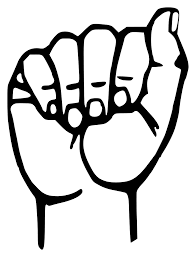

In [33]:
# Generate 400 with left hand
generate_data('A', 'left')

I0000 00:00:1707610859.440601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'


In [35]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    400
Name: count, dtype: int64

In [36]:
# Generate 400 with right hand
generate_data('A', 'right')

I0000 00:00:1707610997.142627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [38]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
Name: count, dtype: int64

### B

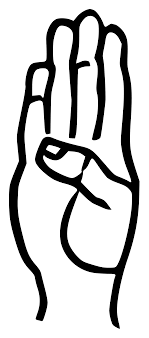

In [40]:
# Generate 400 with left hand
generate_data('B', 'left')

I0000 00:00:1707611140.313695       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'


In [42]:
# Generate 400 with right hand
generate_data('B', 'right')

I0000 00:00:1707611211.992631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute

In [44]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
Name: count, dtype: int64

### C

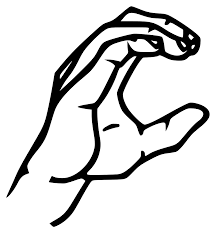

In [45]:
# Generate 400 with left hand
generate_data('C', 'left')

I0000 00:00:1707611354.811552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [46]:
# Generate 400 with right hand
generate_data('C', 'right')

I0000 00:00:1707611398.899765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [47]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
Name: count, dtype: int64

### D

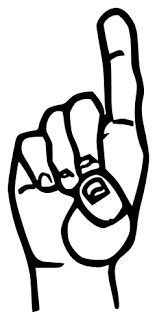

In [48]:
# Generate 400 with left hand
generate_data('D', 'left')

I0000 00:00:1707611534.676170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [49]:
# Generate 400 with right hand
generate_data('D', 'right')

I0000 00:00:1707611588.310033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [50]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
Name: count, dtype: int64

### E

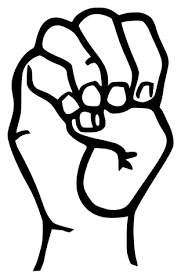

In [51]:
# Generate 400 with left hand
generate_data('E', 'left')

I0000 00:00:1707611743.961509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [52]:
# Generate 400 with right hand
generate_data('E', 'right')

I0000 00:00:1707611796.468629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [53]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
Name: count, dtype: int64

### F

### G

### H

### I

### J

### K

### L

### M

### N

### O

### P

### Q

### R

### S

### T

### U

### V

### W

### X

### Y

### Z

### 0

### 1

### 2

### 3

### 4

### 5

### 6

### 7

### 8

### 9

## Data Processing and Model fitting